# Neural Networks with Keras

In [1]:
from __future__ import print_function
import random
import numpy as np
import pandas as pd
from math import sin

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD   # Stochastic Gradient Descent

from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score as cv

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8, 8)

2024-01-10 15:07:34.311262: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Neural Network Regression

### Polynomial Regression

Let's train a neural network on a few different shapes. First we start with a polynomial (a cubic).

In [2]:
# Create some data

def f(x):
    return x ** 3 - 5 * x + 12 + random.random()

X = np.linspace(-1, 1, 1000).reshape(-1, 1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


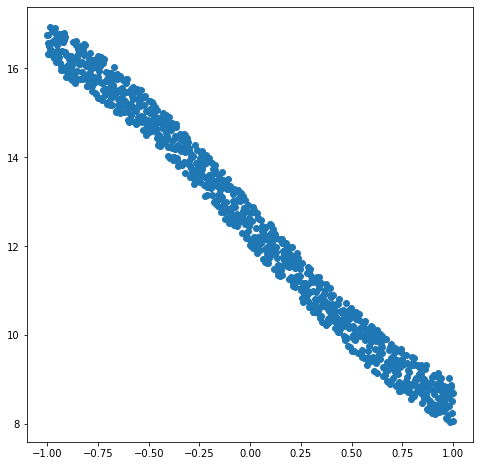

In [3]:
plt.scatter(X, y)

In [4]:
# Define a Feed Forward NN
model = Sequential()
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='linear'))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

In [6]:
# Train the model
print('Training...')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=True)
print(loss.history['loss'][-1])
print("Done")

Training...
Epoch 1/150
8/8 [==============================] - 0s 10ms/step - loss: 0.0850 - val_loss: 0.2595
Epoch 2/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0850 - val_loss: 0.2028
Epoch 3/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0839 - val_loss: 0.1827
Epoch 4/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0841 - val_loss: 0.2361
Epoch 5/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0838 - val_loss: 0.2448
Epoch 6/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0840 - val_loss: 0.1776
Epoch 7/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0839 - val_loss: 0.1935
Epoch 8/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0840 - val_loss: 0.1884
Epoch 9/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0842 - val_loss: 0.2123
Epoch 10/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0841 - val_loss: 0.2495
Epoch 11/150
8/8

8/8 [==============================] - 0s 4ms/step - loss: 0.0852 - val_loss: 0.2203
Epoch 85/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0836 - val_loss: 0.2228
Epoch 86/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0838 - val_loss: 0.1966
Epoch 87/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0837 - val_loss: 0.1561
Epoch 88/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0850 - val_loss: 0.1850
Epoch 89/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0841 - val_loss: 0.1885
Epoch 90/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0840 - val_loss: 0.1824
Epoch 91/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0838 - val_loss: 0.1884
Epoch 92/150
8/8 [==============================] - 0s 5ms/step - loss: 0.0835 - val_loss: 0.1770
Epoch 93/150
8/8 [==============================] - 0s 4ms/step - loss: 0.0838 - val_loss: 0.1766
Epoch 94/150
8/8 [===============

32/32 [==============================] - 0s 996us/step


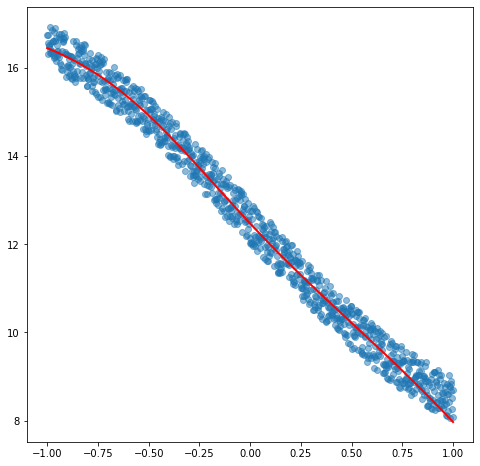

MSE 0.09304242491712927


In [7]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, predictions, color='r', linewidth=2)
plt.show()
print("MSE", mean_squared_error(predictions, y))

### Sine Regression

In [8]:
# Sine data
X = np.linspace(0, 2 * np.pi, 500).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

(500, 1) (500, 1)


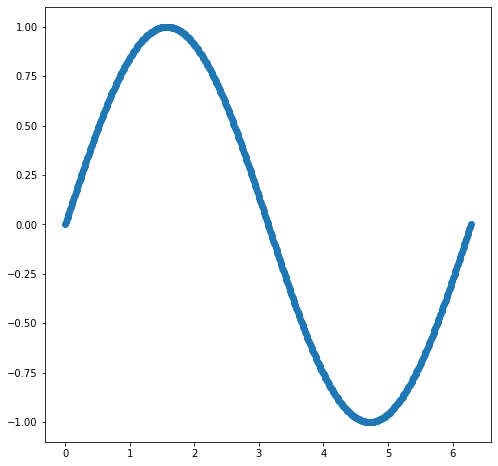

In [9]:
plt.scatter(X, y)

In [10]:
#Create the model
model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.01))

### Train the Model

In [11]:
print('Training..')
loss = model.fit(X, y, epochs=150, validation_split=0.1, 
                 batch_size=128, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

Training..
0.07927942276000977
Complete


16/16 [==============================] - 0s 834us/step


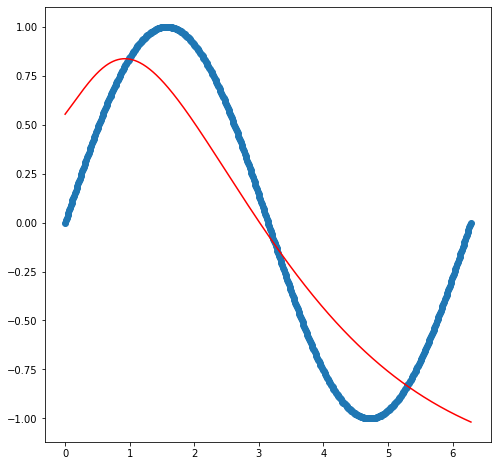

MSE 0.11997500600126455


In [12]:
# Plot the predictions
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

Text(0.5, 1.0, 'MSE by Epoch')

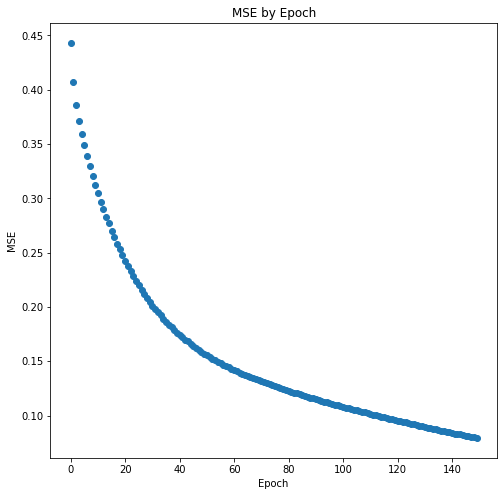

In [13]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])

# plt.scatter(range(len(loss.history['val_loss'])), loss.history['val_loss'], color='red')

plt.xlabel('Epoch')
plt.ylabel('MSE')

plt.title('MSE by Epoch')

### Train longer

If we train for more epochs, we can get a better regression.

(1000, 1) (1000, 1)
Training..
0.0780165046453476
Complete
32/32 [==============================] - 0s 940us/step


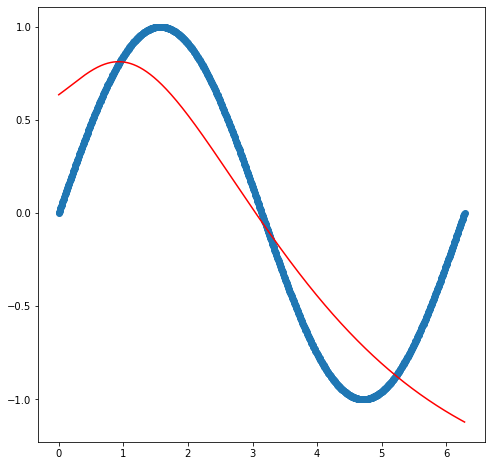

MSE 0.13171944053477344


In [14]:
X = np.linspace(0, 2 * np.pi, 1000).reshape(-1,1)
y = np.sin(X)

print(X.shape, y.shape)

model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='linear', input_shape=(5,)))

#   lr: learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.05))

print('Training..')
loss = model.fit(X, y, epochs=250, validation_split=0.1, 
                 batch_size=256, verbose=False)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

We can take a closer look at the error per training epoch.

Text(0.5, 1.0, 'MSE by Epoch')

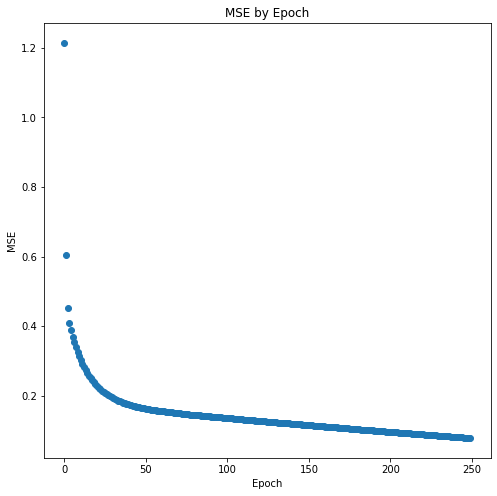

In [15]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE by Epoch')

### Exercise: Perform regression on the following data
Hints:
* Try adding a hidden layer
* Try lowering the learning rate and using more epochs

In [16]:
def f(x):
    return x ** 2 * np.sin(x**2)

# Sine data
X = np.linspace(2, np.pi, 1000).reshape(-1,1)
y = np.array(list(map(f, X)))

print(X.shape, y.shape)

(1000, 1) (1000, 1)


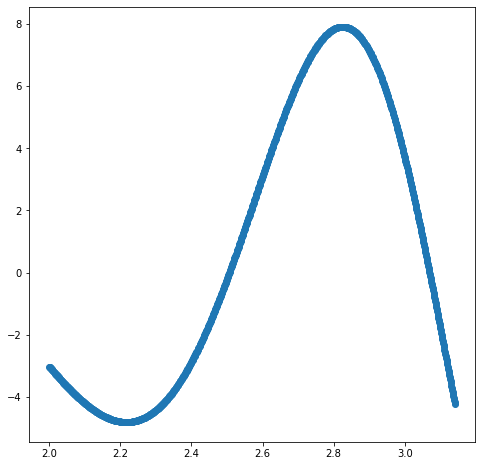

In [17]:
plt.scatter(X, y)

In [ ]:
# Solution


Training..
Epoch 1/10000
8/8 [==============================] - 0s 16ms/step - loss: 23.8023 - val_loss: 7.4800
Epoch 2/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.9371 - val_loss: 5.8313
Epoch 3/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.9021 - val_loss: 8.2419
Epoch 4/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.7720 - val_loss: 7.1511
Epoch 5/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.6243 - val_loss: 7.5909
Epoch 6/10000
8/8 [==============================] - 0s 5ms/step - loss: 22.4855 - val_loss: 5.4301
Epoch 7/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.4483 - val_loss: 7.1956
Epoch 8/10000
8/8 [==============================] - 0s 4ms/step - loss: 22.2366 - val_loss: 9.0987
Epoch 9/10000
8/8 [==============================] - 0s 4ms/step - loss: 21.9454 - val_loss: 4.6466
Epoch 10/10000
8/8 [==============================] - 0s 5ms/step - loss: 24.1474 - val_

8/8 [==============================] - 0s 4ms/step - loss: 4.6479 - val_loss: 33.8243
Epoch 82/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.2830 - val_loss: 35.9134
Epoch 83/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.2402 - val_loss: 43.6050
Epoch 84/10000
8/8 [==============================] - 0s 4ms/step - loss: 12.3405 - val_loss: 40.2521
Epoch 85/10000
8/8 [==============================] - 0s 4ms/step - loss: 9.0312 - val_loss: 44.8250
Epoch 86/10000
8/8 [==============================] - 0s 4ms/step - loss: 5.5033 - val_loss: 45.3530
Epoch 87/10000
8/8 [==============================] - 0s 4ms/step - loss: 7.8434 - val_loss: 44.3761
Epoch 88/10000
8/8 [==============================] - 0s 4ms/step - loss: 11.0446 - val_loss: 44.6432
Epoch 89/10000
8/8 [==============================] - 0s 4ms/step - loss: 8.5212 - val_loss: 45.9954
Epoch 90/10000
8/8 [==============================] - 0s 4ms/step - loss: 11.3351 - val_loss: 38.7065
Ep

8/8 [==============================] - 0s 4ms/step - loss: 1.2791 - val_loss: 61.0984
Epoch 162/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7736 - val_loss: 60.2046
Epoch 163/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.9150 - val_loss: 58.0045
Epoch 164/10000
8/8 [==============================] - 0s 5ms/step - loss: 2.2663 - val_loss: 56.5750
Epoch 165/10000
8/8 [==============================] - 0s 4ms/step - loss: 3.7865 - val_loss: 56.3977
Epoch 166/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1526 - val_loss: 60.5584
Epoch 167/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.5323 - val_loss: 60.4217
Epoch 168/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.6352 - val_loss: 60.0751
Epoch 169/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5163 - val_loss: 61.6050
Epoch 170/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.4271 - val_loss: 61.5

8/8 [==============================] - 0s 4ms/step - loss: 0.9617 - val_loss: 61.2981
Epoch 242/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9656 - val_loss: 61.7416
Epoch 243/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0599 - val_loss: 61.5649
Epoch 244/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0950 - val_loss: 61.3403
Epoch 245/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1664 - val_loss: 59.2455
Epoch 246/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9533 - val_loss: 59.7899
Epoch 247/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9373 - val_loss: 59.6833
Epoch 248/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.9552 - val_loss: 61.5876
Epoch 249/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.0891 - val_loss: 61.3515
Epoch 250/10000
8/8 [==============================] - 0s 5ms/step - loss: 1.5460 - val_loss: 61.8

8/8 [==============================] - 0s 4ms/step - loss: 0.9084 - val_loss: 60.1795
Epoch 322/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9375 - val_loss: 60.3627
Epoch 323/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8816 - val_loss: 60.4724
Epoch 324/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9115 - val_loss: 61.5775
Epoch 325/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9361 - val_loss: 60.6014
Epoch 326/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9329 - val_loss: 61.4059
Epoch 327/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9036 - val_loss: 61.4987
Epoch 328/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.9746 - val_loss: 60.1171
Epoch 329/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8988 - val_loss: 60.2914
Epoch 330/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8774 - val_loss: 59.8

8/8 [==============================] - 0s 3ms/step - loss: 0.8839 - val_loss: 58.2030
Epoch 402/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8106 - val_loss: 58.3043
Epoch 403/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8086 - val_loss: 56.7998
Epoch 404/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8173 - val_loss: 56.6121
Epoch 405/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8339 - val_loss: 58.4185
Epoch 406/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8066 - val_loss: 58.3974
Epoch 407/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.9964 - val_loss: 58.3987
Epoch 408/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7941 - val_loss: 57.4635
Epoch 409/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5530 - val_loss: 56.3288
Epoch 410/10000
8/8 [==============================] - 0s 3ms/step - loss: 3.0922 - val_loss: 53.2

8/8 [==============================] - 0s 4ms/step - loss: 0.7536 - val_loss: 51.5289
Epoch 482/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2740 - val_loss: 51.1639
Epoch 483/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0780 - val_loss: 51.4859
Epoch 484/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6622 - val_loss: 51.0803
Epoch 485/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.2884 - val_loss: 52.4350
Epoch 486/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8258 - val_loss: 51.9891
Epoch 487/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6377 - val_loss: 51.3043
Epoch 488/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8405 - val_loss: 52.4986
Epoch 489/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6802 - val_loss: 53.3472
Epoch 490/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8096 - val_loss: 52.3

8/8 [==============================] - 0s 3ms/step - loss: 2.3316 - val_loss: 42.3896
Epoch 562/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.6360 - val_loss: 40.6768
Epoch 563/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.6857 - val_loss: 45.3749
Epoch 564/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.1138 - val_loss: 41.1038
Epoch 565/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7985 - val_loss: 51.7871
Epoch 566/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.7305 - val_loss: 45.2700
Epoch 567/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4947 - val_loss: 42.3063
Epoch 568/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.9301 - val_loss: 38.3867
Epoch 569/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.5918 - val_loss: 45.8130
Epoch 570/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7612 - val_loss: 45.7

8/8 [==============================] - 0s 3ms/step - loss: 0.5819 - val_loss: 37.9769
Epoch 642/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4753 - val_loss: 39.7247
Epoch 643/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7465 - val_loss: 45.8233
Epoch 644/10000
8/8 [==============================] - 0s 3ms/step - loss: 2.7241 - val_loss: 47.0306
Epoch 645/10000
8/8 [==============================] - 0s 3ms/step - loss: 1.7989 - val_loss: 56.1515
Epoch 646/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8458 - val_loss: 37.8462
Epoch 647/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.6024 - val_loss: 35.2956
Epoch 648/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.5500 - val_loss: 38.1635
Epoch 649/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.4268 - val_loss: 33.2429
Epoch 650/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7157 - val_loss: 33.4

8/8 [==============================] - 0s 4ms/step - loss: 1.6464 - val_loss: 30.2489
Epoch 722/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5122 - val_loss: 31.0682
Epoch 723/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3500 - val_loss: 30.6595
Epoch 724/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2443 - val_loss: 31.0443
Epoch 725/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6601 - val_loss: 41.2165
Epoch 726/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4397 - val_loss: 43.7305
Epoch 727/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7350 - val_loss: 28.6514
Epoch 728/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8711 - val_loss: 28.5056
Epoch 729/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2587 - val_loss: 27.1486
Epoch 730/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6379 - val_loss: 26.1

8/8 [==============================] - 0s 4ms/step - loss: 0.2240 - val_loss: 27.2223
Epoch 802/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.4489 - val_loss: 40.5146
Epoch 803/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.6915 - val_loss: 30.3010
Epoch 804/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2834 - val_loss: 29.1272
Epoch 805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2748 - val_loss: 27.2388
Epoch 806/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.7416 - val_loss: 28.6694
Epoch 807/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8565 - val_loss: 27.5994
Epoch 808/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6273 - val_loss: 25.8309
Epoch 809/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2099 - val_loss: 27.7990
Epoch 810/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2449 - val_loss: 30.6

8/8 [==============================] - 0s 4ms/step - loss: 0.8183 - val_loss: 43.3097
Epoch 882/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.5627 - val_loss: 21.7968
Epoch 883/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.4785 - val_loss: 22.4730
Epoch 884/10000
8/8 [==============================] - 0s 6ms/step - loss: 1.2969 - val_loss: 26.7065
Epoch 885/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3677 - val_loss: 24.7653
Epoch 886/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1806 - val_loss: 22.6343
Epoch 887/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8567 - val_loss: 21.1494
Epoch 888/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1178 - val_loss: 27.6482
Epoch 889/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7305 - val_loss: 30.4526
Epoch 890/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.4116 - val_loss: 28.0

8/8 [==============================] - 0s 3ms/step - loss: 0.2305 - val_loss: 23.1313
Epoch 962/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1933 - val_loss: 22.1541
Epoch 963/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1470 - val_loss: 20.8459
Epoch 964/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7116 - val_loss: 22.1011
Epoch 965/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8232 - val_loss: 24.3522
Epoch 966/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4574 - val_loss: 23.3141
Epoch 967/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1717 - val_loss: 20.1425
Epoch 968/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.8910 - val_loss: 23.1301
Epoch 969/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.6316 - val_loss: 21.5262
Epoch 970/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0652 - val_loss: 22.0

8/8 [==============================] - 0s 4ms/step - loss: 0.3180 - val_loss: 20.1424
Epoch 1042/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1767 - val_loss: 21.1833
Epoch 1043/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2899 - val_loss: 19.7944
Epoch 1044/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.3782 - val_loss: 21.7228
Epoch 1045/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4597 - val_loss: 22.0737
Epoch 1046/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1441 - val_loss: 21.7983
Epoch 1047/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1297 - val_loss: 20.3360
Epoch 1048/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2667 - val_loss: 22.2111
Epoch 1049/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2270 - val_loss: 21.2805
Epoch 1050/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1434 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 19.8983
Epoch 1121/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2725 - val_loss: 20.6742
Epoch 1122/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 21.0562
Epoch 1123/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1474 - val_loss: 22.1325
Epoch 1124/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1660 - val_loss: 20.4287
Epoch 1125/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1666 - val_loss: 20.0342
Epoch 1126/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2647 - val_loss: 18.8417
Epoch 1127/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7222 - val_loss: 19.6476
Epoch 1128/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.8655 - val_loss: 20.2490
Epoch 1129/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5152 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.5291 - val_loss: 68.7154
Epoch 1200/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.1094 - val_loss: 47.6277
Epoch 1201/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.4531 - val_loss: 20.8789
Epoch 1202/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1371 - val_loss: 23.9081
Epoch 1203/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 19.1210
Epoch 1204/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2042 - val_loss: 18.9346
Epoch 1205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 19.6451
Epoch 1206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2290 - val_loss: 19.3704
Epoch 1207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2864 - val_loss: 19.1758
Epoch 1208/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3352 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1320 - val_loss: 19.5349
Epoch 1279/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1991 - val_loss: 18.1137
Epoch 1280/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3570 - val_loss: 17.4375
Epoch 1281/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4243 - val_loss: 19.7029
Epoch 1282/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1268 - val_loss: 19.4544
Epoch 1283/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1270 - val_loss: 19.4736
Epoch 1284/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1430 - val_loss: 19.6432
Epoch 1285/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1513 - val_loss: 18.2777
Epoch 1286/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2860 - val_loss: 18.8770
Epoch 1287/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.3186 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1083 - val_loss: 18.1085
Epoch 1358/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1115 - val_loss: 18.1761
Epoch 1359/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1107 - val_loss: 17.8487
Epoch 1360/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1124 - val_loss: 17.2930
Epoch 1361/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3550 - val_loss: 19.9470
Epoch 1362/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1840 - val_loss: 19.2915
Epoch 1363/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4225 - val_loss: 37.1422
Epoch 1364/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.5047 - val_loss: 17.9045
Epoch 1365/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1386 - val_loss: 21.4371
Epoch 1366/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3987 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.7054 - val_loss: 19.0968
Epoch 1437/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1207 - val_loss: 18.0923
Epoch 1438/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1679 - val_loss: 18.1401
Epoch 1439/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1431 - val_loss: 17.8557
Epoch 1440/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 18.0452
Epoch 1441/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1079 - val_loss: 17.8413
Epoch 1442/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1042 - val_loss: 18.1102
Epoch 1443/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1116 - val_loss: 17.9067
Epoch 1444/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1034 - val_loss: 19.4574
Epoch 1445/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2039 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.2170 - val_loss: 16.3802
Epoch 1516/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2518 - val_loss: 16.8172
Epoch 1517/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1677 - val_loss: 17.9699
Epoch 1518/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1062 - val_loss: 17.7839
Epoch 1519/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1133 - val_loss: 18.1178
Epoch 1520/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1129 - val_loss: 18.2076
Epoch 1521/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1641 - val_loss: 16.8666
Epoch 1522/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4942 - val_loss: 17.9446
Epoch 1523/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1032 - val_loss: 20.2284
Epoch 1524/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2411 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1239 - val_loss: 17.4623
Epoch 1595/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1526 - val_loss: 17.8623
Epoch 1596/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1710 - val_loss: 18.0567
Epoch 1597/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1461 - val_loss: 17.4475
Epoch 1598/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 17.6752
Epoch 1599/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1117 - val_loss: 17.1042
Epoch 1600/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1370 - val_loss: 16.0153
Epoch 1601/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6131 - val_loss: 18.0899
Epoch 1602/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4327 - val_loss: 17.8688
Epoch 1603/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3120 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.3787 - val_loss: 16.8301
Epoch 1674/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1165 - val_loss: 16.8695
Epoch 1675/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1230 - val_loss: 17.3898
Epoch 1676/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1203 - val_loss: 17.1474
Epoch 1677/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1014 - val_loss: 17.1789
Epoch 1678/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1042 - val_loss: 17.0956
Epoch 1679/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1077 - val_loss: 17.1897
Epoch 1680/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1065 - val_loss: 17.2578
Epoch 1681/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1024 - val_loss: 16.9384
Epoch 1682/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0993 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1403 - val_loss: 16.4309
Epoch 1753/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1223 - val_loss: 17.1780
Epoch 1754/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1094 - val_loss: 17.5889
Epoch 1755/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1549 - val_loss: 16.5812
Epoch 1756/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2225 - val_loss: 16.6733
Epoch 1757/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1263 - val_loss: 16.7826
Epoch 1758/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1024 - val_loss: 16.2486
Epoch 1759/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1035 - val_loss: 16.5364
Epoch 1760/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1108 - val_loss: 17.9502
Epoch 1761/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1713 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1256 - val_loss: 16.7309
Epoch 1832/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1055 - val_loss: 17.1906
Epoch 1833/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1111 - val_loss: 19.2138
Epoch 1834/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3933 - val_loss: 16.2327
Epoch 1835/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1844 - val_loss: 15.0779
Epoch 1836/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4035 - val_loss: 15.7780
Epoch 1837/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1933 - val_loss: 17.6592
Epoch 1838/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1416 - val_loss: 16.5079
Epoch 1839/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1009 - val_loss: 16.5418
Epoch 1840/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0986 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1040 - val_loss: 15.6974
Epoch 1911/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1231 - val_loss: 16.2138
Epoch 1912/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1026 - val_loss: 16.2324
Epoch 1913/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0983 - val_loss: 15.6647
Epoch 1914/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2216 - val_loss: 17.0752
Epoch 1915/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1844 - val_loss: 24.3037
Epoch 1916/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3120 - val_loss: 17.0087
Epoch 1917/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1539 - val_loss: 15.4600
Epoch 1918/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1404 - val_loss: 20.3405
Epoch 1919/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3512 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0993 - val_loss: 15.8311
Epoch 1990/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1157 - val_loss: 15.6427
Epoch 1991/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1541 - val_loss: 16.6321
Epoch 1992/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1805 - val_loss: 18.4169
Epoch 1993/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4744 - val_loss: 16.3854
Epoch 1994/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5378 - val_loss: 16.5559
Epoch 1995/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7012 - val_loss: 17.2512
Epoch 1996/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1193 - val_loss: 16.0125
Epoch 1997/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0970 - val_loss: 15.8964
Epoch 1998/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1045 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1028 - val_loss: 15.7933
Epoch 2069/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1221 - val_loss: 15.6463
Epoch 2070/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1004 - val_loss: 15.1838
Epoch 2071/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1914 - val_loss: 15.4587
Epoch 2072/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0991 - val_loss: 14.9135
Epoch 2073/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1605 - val_loss: 15.8159
Epoch 2074/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1003 - val_loss: 15.6692
Epoch 2075/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1023 - val_loss: 14.6686
Epoch 2076/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3410 - val_loss: 16.9302
Epoch 2077/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2249 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.2553 - val_loss: 15.3942
Epoch 2148/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1971 - val_loss: 14.3429
Epoch 2149/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3638 - val_loss: 14.1535
Epoch 2150/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5100 - val_loss: 14.2902
Epoch 2151/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2767 - val_loss: 13.9511
Epoch 2152/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5307 - val_loss: 16.7779
Epoch 2153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1370 - val_loss: 15.4885
Epoch 2154/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1037 - val_loss: 16.7912
Epoch 2155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1406 - val_loss: 17.2138
Epoch 2156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1853 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0986 - val_loss: 14.4201
Epoch 2227/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1802 - val_loss: 14.7683
Epoch 2228/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1413 - val_loss: 15.4337
Epoch 2229/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0969 - val_loss: 16.2167
Epoch 2230/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1157 - val_loss: 17.3820
Epoch 2231/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1572 - val_loss: 16.3193
Epoch 2232/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1997 - val_loss: 15.1574
Epoch 2233/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1276 - val_loss: 17.6479
Epoch 2234/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4882 - val_loss: 31.9435
Epoch 2235/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3282 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1121 - val_loss: 13.8314
Epoch 2306/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2559 - val_loss: 15.7237
Epoch 2307/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1509 - val_loss: 18.7635
Epoch 2308/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4407 - val_loss: 30.8496
Epoch 2309/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.5447 - val_loss: 14.9597
Epoch 2310/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1331 - val_loss: 13.9974
Epoch 2311/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2422 - val_loss: 13.2218
Epoch 2312/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6753 - val_loss: 13.4950
Epoch 2313/10000
8/8 [==============================] - 0s 4ms/step - loss: 1.0177 - val_loss: 13.5063
Epoch 2314/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4430 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1135 - val_loss: 14.0529
Epoch 2385/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1723 - val_loss: 14.0015
Epoch 2386/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2058 - val_loss: 15.8273
Epoch 2387/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2429 - val_loss: 15.2165
Epoch 2388/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1232 - val_loss: 15.2204
Epoch 2389/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1011 - val_loss: 15.9912
Epoch 2390/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1579 - val_loss: 17.9817
Epoch 2391/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3105 - val_loss: 14.8254
Epoch 2392/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1727 - val_loss: 16.7372
Epoch 2393/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1654 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1586 - val_loss: 14.3556
Epoch 2464/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1574 - val_loss: 13.9020
Epoch 2465/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2043 - val_loss: 13.2660
Epoch 2466/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2872 - val_loss: 14.2465
Epoch 2467/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1309 - val_loss: 14.9581
Epoch 2468/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1191 - val_loss: 14.8190
Epoch 2469/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0971 - val_loss: 15.0773
Epoch 2470/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1106 - val_loss: 19.7139
Epoch 2471/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.3819 - val_loss: 13.9977
Epoch 2472/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2076 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1039 - val_loss: 18.6918
Epoch 2543/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2412 - val_loss: 15.3060
Epoch 2544/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1350 - val_loss: 15.0550
Epoch 2545/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1066 - val_loss: 14.7412
Epoch 2546/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1250 - val_loss: 14.7932
Epoch 2547/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0954 - val_loss: 14.6023
Epoch 2548/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1020 - val_loss: 14.4874
Epoch 2549/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0978 - val_loss: 15.1575
Epoch 2550/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1127 - val_loss: 14.3577
Epoch 2551/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0960 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1015 - val_loss: 14.3663
Epoch 2622/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0967 - val_loss: 14.4606
Epoch 2623/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0958 - val_loss: 14.4638
Epoch 2624/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0951 - val_loss: 14.6151
Epoch 2625/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0962 - val_loss: 14.7902
Epoch 2626/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0960 - val_loss: 14.0008
Epoch 2627/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1149 - val_loss: 14.4490
Epoch 2628/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1457 - val_loss: 14.8392
Epoch 2629/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 14.3220
Epoch 2630/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1279 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 14.5246
Epoch 2701/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0993 - val_loss: 16.7994
Epoch 2702/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2717 - val_loss: 13.7997
Epoch 2703/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1098 - val_loss: 14.2454
Epoch 2704/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0943 - val_loss: 14.1445
Epoch 2705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0941 - val_loss: 14.3668
Epoch 2706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0972 - val_loss: 14.4090
Epoch 2707/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0969 - val_loss: 15.5883
Epoch 2708/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1308 - val_loss: 14.1834
Epoch 2709/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0949 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1053 - val_loss: 42.0374
Epoch 2780/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.4782 - val_loss: 14.0051
Epoch 2781/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0957 - val_loss: 14.1973
Epoch 2782/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0935 - val_loss: 14.1623
Epoch 2783/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1098 - val_loss: 13.7513
Epoch 2784/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0959 - val_loss: 13.7373
Epoch 2785/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1073 - val_loss: 14.0130
Epoch 2786/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0956 - val_loss: 13.8247
Epoch 2787/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1163 - val_loss: 14.3507
Epoch 2788/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1043 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0984 - val_loss: 15.9728
Epoch 2859/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2215 - val_loss: 13.8968
Epoch 2860/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1928 - val_loss: 14.4896
Epoch 2861/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 14.2849
Epoch 2862/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0933 - val_loss: 13.8982
Epoch 2863/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1030 - val_loss: 13.7287
Epoch 2864/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0964 - val_loss: 14.1517
Epoch 2865/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0943 - val_loss: 13.8519
Epoch 2866/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0977 - val_loss: 14.0266
Epoch 2867/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1309 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0930 - val_loss: 13.7896
Epoch 2938/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0947 - val_loss: 13.4521
Epoch 2939/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1304 - val_loss: 14.0746
Epoch 2940/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0965 - val_loss: 13.7573
Epoch 2941/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1138 - val_loss: 14.1260
Epoch 2942/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1085 - val_loss: 16.2329
Epoch 2943/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1131 - val_loss: 13.9385
Epoch 2944/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0925 - val_loss: 14.5797
Epoch 2945/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1071 - val_loss: 14.2932
Epoch 2946/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0997 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.2496 - val_loss: 13.9754
Epoch 3017/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0943 - val_loss: 13.5988
Epoch 3018/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1012 - val_loss: 13.8991
Epoch 3019/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0930 - val_loss: 13.8957
Epoch 3020/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0939 - val_loss: 13.6638
Epoch 3021/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0931 - val_loss: 14.0256
Epoch 3022/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0967 - val_loss: 14.0885
Epoch 3023/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 15.0113
Epoch 3024/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1139 - val_loss: 13.9073
Epoch 3025/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0950 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0946 - val_loss: 13.8953
Epoch 3096/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1012 - val_loss: 14.0092
Epoch 3097/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 13.6394
Epoch 3098/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 13.8966
Epoch 3099/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 13.6048
Epoch 3100/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1035 - val_loss: 13.2559
Epoch 3101/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1548 - val_loss: 13.5791
Epoch 3102/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1297 - val_loss: 13.6648
Epoch 3103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1423 - val_loss: 13.6677
Epoch 3104/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1084 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0954 - val_loss: 13.4353
Epoch 3175/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 13.0731
Epoch 3176/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1096 - val_loss: 13.5715
Epoch 3177/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 13.6347
Epoch 3178/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 14.3252
Epoch 3179/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1559 - val_loss: 20.8859
Epoch 3180/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.6458 - val_loss: 14.9833
Epoch 3181/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1486 - val_loss: 13.5711
Epoch 3182/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0945 - val_loss: 13.3634
Epoch 3183/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0936 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0923 - val_loss: 13.5417
Epoch 3254/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0991 - val_loss: 13.6869
Epoch 3255/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1199 - val_loss: 13.6029
Epoch 3256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0988 - val_loss: 13.5487
Epoch 3257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0942 - val_loss: 13.8509
Epoch 3258/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 13.3569
Epoch 3259/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1111 - val_loss: 13.5906
Epoch 3260/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0946 - val_loss: 13.2733
Epoch 3261/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1038 - val_loss: 13.6498
Epoch 3262/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0936 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0972 - val_loss: 13.0274
Epoch 3333/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1005 - val_loss: 13.4921
Epoch 3334/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 12.9746
Epoch 3335/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1111 - val_loss: 13.3165
Epoch 3336/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0946 - val_loss: 12.9878
Epoch 3337/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1854 - val_loss: 13.5046
Epoch 3338/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0922 - val_loss: 13.4362
Epoch 3339/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 13.3401
Epoch 3340/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0940 - val_loss: 13.3454
Epoch 3341/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0922 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1165 - val_loss: 13.4458
Epoch 3412/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 13.1271
Epoch 3413/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 13.1885
Epoch 3414/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 13.2707
Epoch 3415/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 13.1307
Epoch 3416/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0942 - val_loss: 13.1717
Epoch 3417/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0915 - val_loss: 13.2490
Epoch 3418/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 13.3193
Epoch 3419/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0989 - val_loss: 13.3741
Epoch 3420/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1219 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.2593 - val_loss: 13.1571
Epoch 3491/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0940 - val_loss: 13.4908
Epoch 3492/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0969 - val_loss: 13.1414
Epoch 3493/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 13.3883
Epoch 3494/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0989 - val_loss: 13.0167
Epoch 3495/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0931 - val_loss: 13.1669
Epoch 3496/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1064 - val_loss: 12.2513
Epoch 3497/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2479 - val_loss: 11.8279
Epoch 3498/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2871 - val_loss: 13.6340
Epoch 3499/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0993 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0964 - val_loss: 12.5116
Epoch 3570/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1297 - val_loss: 12.7407
Epoch 3571/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0946 - val_loss: 13.0828
Epoch 3572/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0925 - val_loss: 13.0412
Epoch 3573/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 13.0304
Epoch 3574/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0921 - val_loss: 12.5531
Epoch 3575/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1566 - val_loss: 13.6486
Epoch 3576/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1013 - val_loss: 13.2236
Epoch 3577/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0940 - val_loss: 13.1316
Epoch 3578/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0912 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 12.9509
Epoch 3649/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0952 - val_loss: 12.6687
Epoch 3650/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1329 - val_loss: 13.0219
Epoch 3651/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0956 - val_loss: 13.1003
Epoch 3652/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0968 - val_loss: 13.1328
Epoch 3653/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1151 - val_loss: 13.0980
Epoch 3654/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 12.9634
Epoch 3655/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0975 - val_loss: 12.9470
Epoch 3656/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0996 - val_loss: 13.2565
Epoch 3657/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0938 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1068 - val_loss: 12.6570
Epoch 3728/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1011 - val_loss: 12.9431
Epoch 3729/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 13.1159
Epoch 3730/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0940 - val_loss: 13.6246
Epoch 3731/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1097 - val_loss: 12.8530
Epoch 3732/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 13.6693
Epoch 3733/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1024 - val_loss: 12.6893
Epoch 3734/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0925 - val_loss: 13.0048
Epoch 3735/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 12.7926
Epoch 3736/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0918 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1121 - val_loss: 12.4237
Epoch 3807/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1101 - val_loss: 12.9576
Epoch 3808/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 13.1630
Epoch 3809/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0942 - val_loss: 13.0430
Epoch 3810/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1015 - val_loss: 13.5550
Epoch 3811/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1123 - val_loss: 14.9549
Epoch 3812/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1394 - val_loss: 12.5994
Epoch 3813/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1250 - val_loss: 13.3528
Epoch 3814/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0941 - val_loss: 13.9993
Epoch 3815/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1574 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1573 - val_loss: 13.1941
Epoch 3886/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1121 - val_loss: 12.6037
Epoch 3887/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0967 - val_loss: 12.6235
Epoch 3888/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1027 - val_loss: 12.7482
Epoch 3889/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 12.4395
Epoch 3890/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1012 - val_loss: 12.8704
Epoch 3891/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 12.4392
Epoch 3892/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0993 - val_loss: 12.8802
Epoch 3893/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0970 - val_loss: 12.6304
Epoch 3894/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0911 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0924 - val_loss: 12.6443
Epoch 3965/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0918 - val_loss: 12.4797
Epoch 3966/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1041 - val_loss: 12.8948
Epoch 3967/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0915 - val_loss: 12.8624
Epoch 3968/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0908 - val_loss: 12.5710
Epoch 3969/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0941 - val_loss: 15.2424
Epoch 3970/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2296 - val_loss: 12.9550
Epoch 3971/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0917 - val_loss: 12.9408
Epoch 3972/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0914 - val_loss: 12.7908
Epoch 3973/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 12.4400
Epoch 4044/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 12.4078
Epoch 4045/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 13.7906
Epoch 4046/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1480 - val_loss: 12.0738
Epoch 4047/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1019 - val_loss: 12.1359
Epoch 4048/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1033 - val_loss: 12.1458
Epoch 4049/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 11.5768
Epoch 4050/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1269 - val_loss: 12.8248
Epoch 4051/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 12.3892
Epoch 4052/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0930 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 12.6494
Epoch 4123/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 12.3400
Epoch 4124/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0921 - val_loss: 11.9448
Epoch 4125/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1067 - val_loss: 12.4353
Epoch 4126/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 12.3275
Epoch 4127/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0900 - val_loss: 12.2888
Epoch 4128/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0928 - val_loss: 12.0288
Epoch 4129/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0986 - val_loss: 12.4123
Epoch 4130/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0912 - val_loss: 11.4478
Epoch 4131/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1501 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.4732 - val_loss: 10.3329
Epoch 4202/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.7205 - val_loss: 11.2328
Epoch 4203/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2755 - val_loss: 13.4314
Epoch 4204/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1054 - val_loss: 13.1208
Epoch 4205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 12.7976
Epoch 4206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0917 - val_loss: 12.3048
Epoch 4207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0969 - val_loss: 12.7421
Epoch 4208/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 12.2925
Epoch 4209/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0921 - val_loss: 12.4686
Epoch 4210/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0898 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0962 - val_loss: 12.7001
Epoch 4281/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 14.3322
Epoch 4282/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1229 - val_loss: 13.5520
Epoch 4283/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1140 - val_loss: 12.7083
Epoch 4284/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1269 - val_loss: 13.1937
Epoch 4285/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1012 - val_loss: 12.3666
Epoch 4286/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 14.8099
Epoch 4287/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1519 - val_loss: 12.1169
Epoch 4288/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0920 - val_loss: 13.9680
Epoch 4289/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1791 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 12.5702
Epoch 4360/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 12.5043
Epoch 4361/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 12.3661
Epoch 4362/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1216 - val_loss: 11.7588
Epoch 4363/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1214 - val_loss: 12.5381
Epoch 4364/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 13.0538
Epoch 4365/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1129 - val_loss: 12.8220
Epoch 4366/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1149 - val_loss: 12.0555
Epoch 4367/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0966 - val_loss: 12.2092
Epoch 4368/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0960 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1100 - val_loss: 13.4992
Epoch 4439/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1416 - val_loss: 25.5212
Epoch 4440/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2492 - val_loss: 11.8890
Epoch 4441/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1151 - val_loss: 11.3852
Epoch 4442/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1387 - val_loss: 11.7203
Epoch 4443/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0959 - val_loss: 12.3934
Epoch 4444/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 12.3637
Epoch 4445/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0903 - val_loss: 12.2443
Epoch 4446/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 11.9668
Epoch 4447/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0981 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 12.0818
Epoch 4518/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0939 - val_loss: 12.1407
Epoch 4519/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 11.8631
Epoch 4520/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 12.0980
Epoch 4521/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0916 - val_loss: 12.0160
Epoch 4522/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 12.0594
Epoch 4523/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 11.9087
Epoch 4524/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 11.7639
Epoch 4525/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 12.0969
Epoch 4526/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1315 - val_loss: 11.8136
Epoch 4597/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1029 - val_loss: 11.7580
Epoch 4598/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1119 - val_loss: 11.7547
Epoch 4599/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0936 - val_loss: 12.7749
Epoch 4600/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1021 - val_loss: 11.9398
Epoch 4601/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0918 - val_loss: 12.1519
Epoch 4602/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0939 - val_loss: 10.3970
Epoch 4603/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3728 - val_loss: 13.0771
Epoch 4604/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0983 - val_loss: 13.9609
Epoch 4605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3158 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.1292 - val_loss: 11.6777
Epoch 4676/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1074 - val_loss: 12.0399
Epoch 4677/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0908 - val_loss: 12.2254
Epoch 4678/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 12.0142
Epoch 4679/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 11.9667
Epoch 4680/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 12.4685
Epoch 4681/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0933 - val_loss: 12.0492
Epoch 4682/10000
8/8 [==============================] - 0s 8ms/step - loss: 0.1071 - val_loss: 12.0944
Epoch 4683/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 11.9412
Epoch 4684/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0920 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0950 - val_loss: 11.7176
Epoch 4755/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 12.0248
Epoch 4756/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 12.1218
Epoch 4757/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 13.1387
Epoch 4758/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 11.8421
Epoch 4759/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0993 - val_loss: 12.1065
Epoch 4760/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 12.0445
Epoch 4761/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0911 - val_loss: 12.0462
Epoch 4762/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0908 - val_loss: 13.1134
Epoch 4763/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1080 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0920 - val_loss: 10.6587
Epoch 4834/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3792 - val_loss: 11.3751
Epoch 4835/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2370 - val_loss: 11.9306
Epoch 4836/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 12.1295
Epoch 4837/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 11.8134
Epoch 4838/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 13.0361
Epoch 4839/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1223 - val_loss: 11.5192
Epoch 4840/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0922 - val_loss: 12.6315
Epoch 4841/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0975 - val_loss: 11.7485
Epoch 4842/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0922 - val_loss: 11.7324
Epoch 4913/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0908 - val_loss: 11.7742
Epoch 4914/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0906 - val_loss: 11.6286
Epoch 4915/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0954 - val_loss: 10.7363
Epoch 4916/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1475 - val_loss: 10.8350
Epoch 4917/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.3536 - val_loss: 12.4752
Epoch 4918/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1067 - val_loss: 11.7258
Epoch 4919/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1002 - val_loss: 12.0190
Epoch 4920/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 11.6171
Epoch 4921/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0923 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.8092 - val_loss: 11.4869
Epoch 4992/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0944 - val_loss: 10.6892
Epoch 4993/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1414 - val_loss: 11.1034
Epoch 4994/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1218 - val_loss: 11.2410
Epoch 4995/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1131 - val_loss: 11.8666
Epoch 4996/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 11.4845
Epoch 4997/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 12.3805
Epoch 4998/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 11.9293
Epoch 4999/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 12.0104
Epoch 5000/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0966 - val_loss: 11.0287
Epoch 5071/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1503 - val_loss: 11.9125
Epoch 5072/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0987 - val_loss: 13.6837
Epoch 5073/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1619 - val_loss: 14.2375
Epoch 5074/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1159 - val_loss: 11.6857
Epoch 5075/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 11.5328
Epoch 5076/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 11.7810
Epoch 5077/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0943 - val_loss: 11.6625
Epoch 5078/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0922 - val_loss: 12.7687
Epoch 5079/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1119 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 11.8466
Epoch 5150/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 11.8425
Epoch 5151/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 11.9891
Epoch 5152/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 11.8097
Epoch 5153/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0944 - val_loss: 11.8171
Epoch 5154/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0957 - val_loss: 11.8596
Epoch 5155/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0963 - val_loss: 10.7350
Epoch 5156/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 11.4375
Epoch 5157/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0948 - val_loss: 11.7018
Epoch 5158/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0892 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 11.4485
Epoch 5229/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 11.5312
Epoch 5230/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0892 - val_loss: 10.8999
Epoch 5231/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1130 - val_loss: 11.7347
Epoch 5232/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 10.2733
Epoch 5233/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2654 - val_loss: 10.1749
Epoch 5234/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2803 - val_loss: 9.8116
Epoch 5235/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3711 - val_loss: 10.2996
Epoch 5236/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1992 - val_loss: 12.1389
Epoch 5237/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1010 - val_lo

8/8 [==============================] - 0s 4ms/step - loss: 0.1009 - val_loss: 11.0029
Epoch 5308/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1214 - val_loss: 11.9663
Epoch 5309/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1040 - val_loss: 11.3860
Epoch 5310/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 11.6665
Epoch 5311/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 10.6542
Epoch 5312/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1996 - val_loss: 11.1047
Epoch 5313/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 11.5011
Epoch 5314/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0925 - val_loss: 11.4312
Epoch 5315/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 11.6036
Epoch 5316/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0973 - val_loss: 11.3613
Epoch 5387/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1246 - val_loss: 11.6902
Epoch 5388/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0914 - val_loss: 10.5502
Epoch 5389/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1236 - val_loss: 10.2767
Epoch 5390/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2040 - val_loss: 10.6646
Epoch 5391/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1342 - val_loss: 10.8646
Epoch 5392/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1147 - val_loss: 11.7793
Epoch 5393/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 11.4255
Epoch 5394/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 11.6717
Epoch 5395/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0892 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.2062 - val_loss: 12.0542
Epoch 5466/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1564 - val_loss: 11.0018
Epoch 5467/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1054 - val_loss: 10.9893
Epoch 5468/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 11.5156
Epoch 5469/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 11.2073
Epoch 5470/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0885 - val_loss: 11.4984
Epoch 5471/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 11.6203
Epoch 5472/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0889 - val_loss: 11.3632
Epoch 5473/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 11.3230
Epoch 5474/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0885 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1482 - val_loss: 10.6955
Epoch 5545/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1284 - val_loss: 11.4155
Epoch 5546/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 11.3203
Epoch 5547/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 11.3179
Epoch 5548/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0885 - val_loss: 11.1453
Epoch 5549/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 11.4336
Epoch 5550/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 12.5705
Epoch 5551/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1003 - val_loss: 11.2317
Epoch 5552/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 11.6299
Epoch 5553/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0900 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 11.2658
Epoch 5624/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 11.3611
Epoch 5625/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 12.1765
Epoch 5626/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1174 - val_loss: 11.2680
Epoch 5627/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 11.3932
Epoch 5628/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0882 - val_loss: 11.1209
Epoch 5629/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 10.8216
Epoch 5630/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1023 - val_loss: 10.4958
Epoch 5631/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1031 - val_loss: 10.8578
Epoch 5632/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1155 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 11.8237
Epoch 5703/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0961 - val_loss: 11.4655
Epoch 5704/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 11.3442
Epoch 5705/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 11.1095
Epoch 5706/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 9.8906
Epoch 5707/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1918 - val_loss: 11.7582
Epoch 5708/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1027 - val_loss: 13.5625
Epoch 5709/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2331 - val_loss: 10.6934
Epoch 5710/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0952 - val_loss: 11.2900
Epoch 5711/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_lo

8/8 [==============================] - 0s 4ms/step - loss: 0.1174 - val_loss: 11.4162
Epoch 5782/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 11.5033
Epoch 5783/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 11.1164
Epoch 5784/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0891 - val_loss: 11.0987
Epoch 5785/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 11.1062
Epoch 5786/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 11.2286
Epoch 5787/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0910 - val_loss: 11.0945
Epoch 5788/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 10.7121
Epoch 5789/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1151 - val_loss: 11.2932
Epoch 5790/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 11.1500
Epoch 5861/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0947 - val_loss: 11.2027
Epoch 5862/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0912 - val_loss: 13.4866
Epoch 5863/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.2443 - val_loss: 10.7628
Epoch 5864/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0908 - val_loss: 10.1549
Epoch 5865/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1606 - val_loss: 10.6738
Epoch 5866/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1113 - val_loss: 11.4361
Epoch 5867/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0916 - val_loss: 11.3835
Epoch 5868/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 12.4688
Epoch 5869/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1378 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 11.2858
Epoch 5940/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 10.6736
Epoch 5941/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 10.5685
Epoch 5942/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1313 - val_loss: 11.1601
Epoch 5943/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 10.9128
Epoch 5944/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 11.2069
Epoch 5945/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 12.1599
Epoch 5946/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1004 - val_loss: 10.9891
Epoch 5947/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 11.2344
Epoch 5948/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1949 - val_loss: 11.2614
Epoch 6019/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1046 - val_loss: 11.0320
Epoch 6020/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0979 - val_loss: 11.2557
Epoch 6021/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 12.0901
Epoch 6022/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0971 - val_loss: 10.5790
Epoch 6023/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1325 - val_loss: 11.1515
Epoch 6024/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 11.1511
Epoch 6025/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 10.8671
Epoch 6026/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0930 - val_loss: 11.1123
Epoch 6027/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0900 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0884 - val_loss: 10.0914
Epoch 6098/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1408 - val_loss: 11.2183
Epoch 6099/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 12.1480
Epoch 6100/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1097 - val_loss: 10.6823
Epoch 6101/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0926 - val_loss: 10.8250
Epoch 6102/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0912 - val_loss: 10.6130
Epoch 6103/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0960 - val_loss: 10.6548
Epoch 6104/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1044 - val_loss: 10.7885
Epoch 6105/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0970 - val_loss: 11.0158
Epoch 6106/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 11.0228
Epoch 6177/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 10.8747
Epoch 6178/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0909 - val_loss: 11.0012
Epoch 6179/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 10.9730
Epoch 6180/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0885 - val_loss: 10.7396
Epoch 6181/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0884 - val_loss: 10.7966
Epoch 6182/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0910 - val_loss: 10.7548
Epoch 6183/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0951 - val_loss: 10.4395
Epoch 6184/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1203 - val_loss: 11.0338
Epoch 6185/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1383 - val_loss: 12.0309
Epoch 6256/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1658 - val_loss: 10.8787
Epoch 6257/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 11.0530
Epoch 6258/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0944 - val_loss: 10.9193
Epoch 6259/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0900 - val_loss: 10.9325
Epoch 6260/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 9.8115
Epoch 6261/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1999 - val_loss: 11.2019
Epoch 6262/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0925 - val_loss: 11.0475
Epoch 6263/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0903 - val_loss: 13.3273
Epoch 6264/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1487 - val_lo

8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 12.4350
Epoch 6335/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1294 - val_loss: 11.0706
Epoch 6336/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1308 - val_loss: 25.0465
Epoch 6337/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2418 - val_loss: 10.5251
Epoch 6338/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 10.9163
Epoch 6339/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 12.2861
Epoch 6340/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1016 - val_loss: 10.8144
Epoch 6341/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1047 - val_loss: 14.7986
Epoch 6342/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1826 - val_loss: 10.6651
Epoch 6343/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1028 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1598 - val_loss: 9.9334
Epoch 6414/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1458 - val_loss: 11.0720
Epoch 6415/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0918 - val_loss: 9.6663
Epoch 6416/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1330 - val_loss: 10.9398
Epoch 6417/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 10.5674
Epoch 6418/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0999 - val_loss: 10.9102
Epoch 6419/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 10.7516
Epoch 6420/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0947 - val_loss: 11.7669
Epoch 6421/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 10.7159
Epoch 6422/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_los

Epoch 6493/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 10.3686
Epoch 6494/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0967 - val_loss: 11.2136
Epoch 6495/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 10.7885
Epoch 6496/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 10.8101
Epoch 6497/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 11.6034
Epoch 6498/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1193 - val_loss: 10.5776
Epoch 6499/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 10.8326
Epoch 6500/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 10.6414
Epoch 6501/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 10.7852
Epoch 6502/10000
8/8 [==============================] - 0s 4ms/step - los

8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 10.7515
Epoch 6573/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 11.7737
Epoch 6574/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1258 - val_loss: 10.4567
Epoch 6575/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0995 - val_loss: 10.9306
Epoch 6576/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 10.7640
Epoch 6577/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 10.5769
Epoch 6578/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 10.7076
Epoch 6579/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0897 - val_loss: 10.6012
Epoch 6580/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 10.5081
Epoch 6581/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0886 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 0.1028 - val_loss: 10.7216
Epoch 6652/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 10.7006
Epoch 6653/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 11.6217
Epoch 6654/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.1152 - val_loss: 10.6379
Epoch 6655/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 10.4906
Epoch 6656/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 10.8428
Epoch 6657/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 10.7009
Epoch 6658/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0883 - val_loss: 10.8630
Epoch 6659/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 10.4351
Epoch 6660/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0915 - val_l

Epoch 6731/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1523 - val_loss: 10.9847
Epoch 6732/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 10.9257
Epoch 6733/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0914 - val_loss: 10.7663
Epoch 6734/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0891 - val_loss: 10.4132
Epoch 6735/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 9.5105
Epoch 6736/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1586 - val_loss: 11.2258
Epoch 6737/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1197 - val_loss: 10.3534
Epoch 6738/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0952 - val_loss: 10.7651
Epoch 6739/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 10.7010
Epoch 6740/10000
8/8 [==============================] - 0s 4ms/step - loss

8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 10.2328
Epoch 6811/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1060 - val_loss: 10.5637
Epoch 6812/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 10.6798
Epoch 6813/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 9.8753
Epoch 6814/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1770 - val_loss: 11.4169
Epoch 6815/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0931 - val_loss: 10.5987
Epoch 6816/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 10.2082
Epoch 6817/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1047 - val_loss: 10.8974
Epoch 6818/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_loss: 10.4619
Epoch 6819/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1002 - val_lo

8/8 [==============================] - 0s 4ms/step - loss: 0.1185 - val_loss: 10.7504
Epoch 6890/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0891 - val_loss: 13.8402
Epoch 6891/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2252 - val_loss: 12.8123
Epoch 6892/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1513 - val_loss: 16.5578
Epoch 6893/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1895 - val_loss: 10.4218
Epoch 6894/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 10.6167
Epoch 6895/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0882 - val_loss: 10.8565
Epoch 6896/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 10.7562
Epoch 6897/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 11.3897
Epoch 6898/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0994 - val_l

Epoch 6969/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1146 - val_loss: 10.6194
Epoch 6970/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 10.2993
Epoch 6971/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 10.5411
Epoch 6972/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 10.4211
Epoch 6973/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0902 - val_loss: 10.4418
Epoch 6974/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 9.0801
Epoch 6975/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1983 - val_loss: 10.4782
Epoch 6976/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0937 - val_loss: 10.2068
Epoch 6977/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0934 - val_loss: 10.6939
Epoch 6978/10000
8/8 [==============================] - 0s 4ms/step - loss

8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 10.4145
Epoch 7049/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 10.8865
Epoch 7050/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0909 - val_loss: 10.1677
Epoch 7051/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0941 - val_loss: 10.2765
Epoch 7052/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0891 - val_loss: 10.6943
Epoch 7053/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 10.4780
Epoch 7054/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 10.5290
Epoch 7055/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 10.5364
Epoch 7056/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_loss: 10.4020
Epoch 7057/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_l

Epoch 7128/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3335 - val_loss: 10.2696
Epoch 7129/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1325 - val_loss: 8.8299
Epoch 7130/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.3037 - val_loss: 10.6435
Epoch 7131/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0985 - val_loss: 10.4906
Epoch 7132/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 9.6668
Epoch 7133/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1309 - val_loss: 10.6491
Epoch 7134/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0986 - val_loss: 10.2834
Epoch 7135/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0940 - val_loss: 10.8941
Epoch 7136/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 10.3789
Epoch 7137/10000
8/8 [==============================] - 0s 4ms/step - loss:

8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_loss: 10.7784
Epoch 7208/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 11.4219
Epoch 7209/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0969 - val_loss: 10.3369
Epoch 7210/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 10.4270
Epoch 7211/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 10.4917
Epoch 7212/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 9.8779
Epoch 7213/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0963 - val_loss: 10.3957
Epoch 7214/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 10.2216
Epoch 7215/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0942 - val_loss: 10.2720
Epoch 7216/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_lo

Epoch 7287/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 11.4900
Epoch 7288/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1080 - val_loss: 10.3116
Epoch 7289/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 10.3594
Epoch 7290/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 10.5070
Epoch 7291/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0891 - val_loss: 10.3761
Epoch 7292/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0875 - val_loss: 10.2538
Epoch 7293/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0878 - val_loss: 10.3185
Epoch 7294/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0887 - val_loss: 10.3021
Epoch 7295/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 10.5283
Epoch 7296/10000
8/8 [==============================] - 0s 4ms/step - los

8/8 [==============================] - 0s 4ms/step - loss: 0.1117 - val_loss: 10.3334
Epoch 7367/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0967 - val_loss: 10.3269
Epoch 7368/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 10.3770
Epoch 7369/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 10.0215
Epoch 7370/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 10.3499
Epoch 7371/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1024 - val_loss: 10.9141
Epoch 7372/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0905 - val_loss: 10.4455
Epoch 7373/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 10.9745
Epoch 7374/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1080 - val_loss: 10.1337
Epoch 7375/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_l

Epoch 7446/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 11.4868
Epoch 7447/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1155 - val_loss: 10.0188
Epoch 7448/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 10.3564
Epoch 7449/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 10.1451
Epoch 7450/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 12.6794
Epoch 7451/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1292 - val_loss: 10.9484
Epoch 7452/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0939 - val_loss: 10.2504
Epoch 7453/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 10.3195
Epoch 7454/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 10.2884
Epoch 7455/10000
8/8 [==============================] - 0s 4ms/step - los

8/8 [==============================] - 0s 4ms/step - loss: 0.1085 - val_loss: 12.8631
Epoch 7526/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1927 - val_loss: 14.1486
Epoch 7527/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1152 - val_loss: 12.0182
Epoch 7528/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1038 - val_loss: 9.9898
Epoch 7529/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0898 - val_loss: 10.3816
Epoch 7530/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0876 - val_loss: 10.3658
Epoch 7531/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0932 - val_loss: 11.5711
Epoch 7532/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1081 - val_loss: 10.1813
Epoch 7533/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 10.4312
Epoch 7534/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0893 - val_lo

Epoch 7605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1437 - val_loss: 10.2095
Epoch 7606/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 9.6113
Epoch 7607/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1116 - val_loss: 9.4420
Epoch 7608/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1069 - val_loss: 10.4641
Epoch 7609/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0926 - val_loss: 9.9968
Epoch 7610/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0897 - val_loss: 10.1524
Epoch 7611/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 10.2470
Epoch 7612/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0880 - val_loss: 10.2244
Epoch 7613/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 9.8635
Epoch 7614/10000
8/8 [==============================] - 0s 5ms/step - loss: 0

Epoch 7685/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0885 - val_loss: 9.9369
Epoch 7686/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 10.8896
Epoch 7687/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0958 - val_loss: 9.9337
Epoch 7688/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 10.1189
Epoch 7689/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0892 - val_loss: 10.0318
Epoch 7690/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0949 - val_loss: 10.1909
Epoch 7691/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 9.5453
Epoch 7692/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1030 - val_loss: 10.3377
Epoch 7693/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 11.2702
Epoch 7694/10000
8/8 [==============================] - 0s 4ms/step - loss: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 10.0456
Epoch 7765/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 10.2215
Epoch 7766/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 10.3472
Epoch 7767/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 10.1573
Epoch 7768/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0890 - val_loss: 10.0859
Epoch 7769/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 10.1793
Epoch 7770/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 9.9931
Epoch 7771/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 10.3973
Epoch 7772/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 10.1079
Epoch 7773/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_lo

Epoch 7844/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 11.3769
Epoch 7845/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1281 - val_loss: 9.8922
Epoch 7846/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0924 - val_loss: 10.2459
Epoch 7847/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0872 - val_loss: 9.8862
Epoch 7848/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 10.1261
Epoch 7849/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 9.8186
Epoch 7850/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0931 - val_loss: 11.3171
Epoch 7851/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1107 - val_loss: 10.0575
Epoch 7852/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 10.3348
Epoch 7853/10000
8/8 [==============================] - 0s 3ms/step - loss: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 10.6921
Epoch 7924/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0928 - val_loss: 10.1673
Epoch 7925/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 10.2785
Epoch 7926/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 9.9804
Epoch 7927/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 10.0294
Epoch 7928/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 10.8348
Epoch 7929/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1072 - val_loss: 10.0911
Epoch 7930/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0918 - val_loss: 10.3192
Epoch 7931/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 10.6372
Epoch 7932/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0991 - val_lo

Epoch 8003/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 10.0662
Epoch 8004/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.9084
Epoch 8005/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 10.1159
Epoch 8006/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 9.8270
Epoch 8007/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 10.0907
Epoch 8008/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 9.8882
Epoch 8009/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_loss: 9.8982
Epoch 8010/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0887 - val_loss: 10.1121
Epoch 8011/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 11.8520
Epoch 8012/10000
8/8 [==============================] - 0s 4ms/step - loss: 0

Epoch 8083/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 10.5931
Epoch 8084/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0894 - val_loss: 9.7402
Epoch 8085/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0896 - val_loss: 9.7601
Epoch 8086/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 10.5381
Epoch 8087/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1003 - val_loss: 9.9262
Epoch 8088/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0892 - val_loss: 11.3527
Epoch 8089/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1101 - val_loss: 10.5582
Epoch 8090/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 10.0134
Epoch 8091/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 9.7860
Epoch 8092/10000
8/8 [==============================] - 0s 4ms/step - loss: 0

Epoch 8163/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1616 - val_loss: 10.3369
Epoch 8164/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 9.8357
Epoch 8165/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 10.1911
Epoch 8166/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 10.0686
Epoch 8167/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.9826
Epoch 8168/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 10.0919
Epoch 8169/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0924 - val_loss: 10.0091
Epoch 8170/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 10.0460
Epoch 8171/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 10.1068
Epoch 8172/10000
8/8 [==============================] - 0s 5ms/step - loss:

Epoch 8243/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1087 - val_loss: 9.8953
Epoch 8244/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 9.6811
Epoch 8245/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0932 - val_loss: 10.2713
Epoch 8246/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 10.0842
Epoch 8247/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 9.9438
Epoch 8248/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 10.0910
Epoch 8249/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0872 - val_loss: 9.8240
Epoch 8250/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.7855
Epoch 8251/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 8.8267
Epoch 8252/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1

Epoch 8323/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 9.9740
Epoch 8324/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 9.8774
Epoch 8325/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.8106
Epoch 8326/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0877 - val_loss: 10.1733
Epoch 8327/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 9.9526
Epoch 8328/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 9.1746
Epoch 8329/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1111 - val_loss: 9.7348
Epoch 8330/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0907 - val_loss: 9.9465
Epoch 8331/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0980 - val_loss: 9.1360
Epoch 8332/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.129

8/8 [==============================] - 0s 4ms/step - loss: 0.0882 - val_loss: 10.0310
Epoch 8404/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0870 - val_loss: 9.8951
Epoch 8405/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0876 - val_loss: 10.0657
Epoch 8406/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 9.8150
Epoch 8407/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0871 - val_loss: 9.7909
Epoch 8408/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0869 - val_loss: 9.9047
Epoch 8409/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.3331
Epoch 8410/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 10.0318
Epoch 8411/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 9.8409
Epoch 8412/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 9

8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 9.9351
Epoch 8484/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 9.8089
Epoch 8485/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 9.7022
Epoch 8486/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 10.0950
Epoch 8487/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.9116
Epoch 8488/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 9.8782
Epoch 8489/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_loss: 10.5889
Epoch 8490/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - val_loss: 9.8242
Epoch 8491/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 9.7530
Epoch 8492/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 9.

8/8 [==============================] - 0s 4ms/step - loss: 0.0881 - val_loss: 9.8752
Epoch 8564/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.2749
Epoch 8565/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0988 - val_loss: 9.9798
Epoch 8566/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.9312
Epoch 8567/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 9.6371
Epoch 8568/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 9.5630
Epoch 8569/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0945 - val_loss: 9.7503
Epoch 8570/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0960 - val_loss: 9.1854
Epoch 8571/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1347 - val_loss: 9.4088
Epoch 8572/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0945 - val_loss: 10.0

8/8 [==============================] - 0s 4ms/step - loss: 0.1020 - val_loss: 10.6081
Epoch 8644/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1212 - val_loss: 9.9587
Epoch 8645/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 9.7751
Epoch 8646/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 10.0842
Epoch 8647/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.2826
Epoch 8648/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0984 - val_loss: 10.0831
Epoch 8649/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 12.1887
Epoch 8650/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1276 - val_loss: 9.8227
Epoch 8651/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 9.3576
Epoch 8652/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0906 - val_loss: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 9.8977
Epoch 8724/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.7327
Epoch 8725/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 9.8272
Epoch 8726/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0864 - val_loss: 9.7680
Epoch 8727/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0864 - val_loss: 9.6217
Epoch 8728/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 9.9294
Epoch 8729/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 9.2442
Epoch 8730/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0964 - val_loss: 11.3770
Epoch 8731/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1163 - val_loss: 9.8027
Epoch 8732/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.5

8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 9.8492
Epoch 8804/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 9.8789
Epoch 8805/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 9.6693
Epoch 8806/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.4760
Epoch 8807/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0883 - val_loss: 10.7566
Epoch 8808/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1230 - val_loss: 11.9838
Epoch 8809/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1511 - val_loss: 9.6672
Epoch 8810/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0964 - val_loss: 9.5680
Epoch 8811/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 11.9810
Epoch 8812/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1287 - val_loss: 9

8/8 [==============================] - 0s 3ms/step - loss: 0.0863 - val_loss: 9.4400
Epoch 8884/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0935 - val_loss: 10.1682
Epoch 8885/10000
8/8 [==============================] - 0s 3ms/step - loss: 0.0921 - val_loss: 11.7391
Epoch 8886/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1908 - val_loss: 9.8338
Epoch 8887/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1020 - val_loss: 9.8586
Epoch 8888/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.8975
Epoch 8889/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0913 - val_loss: 9.8745
Epoch 8890/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.3314
Epoch 8891/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0918 - val_loss: 9.7653
Epoch 8892/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 9.

8/8 [==============================] - 0s 4ms/step - loss: 0.0884 - val_loss: 10.5443
Epoch 8964/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1075 - val_loss: 9.6356
Epoch 8965/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - val_loss: 9.4001
Epoch 8966/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0956 - val_loss: 9.9466
Epoch 8967/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.8214
Epoch 8968/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 9.3597
Epoch 8969/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 9.4852
Epoch 8970/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 9.4155
Epoch 8971/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 9.6547
Epoch 8972/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 9.7

8/8 [==============================] - 0s 7ms/step - loss: 0.0870 - val_loss: 9.7259
Epoch 9044/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0861 - val_loss: 9.7948
Epoch 9045/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 9.7754
Epoch 9046/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0862 - val_loss: 10.1636
Epoch 9047/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0982 - val_loss: 9.7046
Epoch 9048/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.6705
Epoch 9049/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 9.5607
Epoch 9050/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 9.7001
Epoch 9051/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 8.7260
Epoch 9052/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1078 - val_loss: 8.4

8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 9.7142
Epoch 9124/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0872 - val_loss: 10.5079
Epoch 9125/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1200 - val_loss: 12.0662
Epoch 9126/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1795 - val_loss: 9.4102
Epoch 9127/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0893 - val_loss: 9.7396
Epoch 9128/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0875 - val_loss: 9.6931
Epoch 9129/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 10.3991
Epoch 9130/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 9.6566
Epoch 9131/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 8.4863
Epoch 9132/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1898 - val_loss: 9

8/8 [==============================] - 0s 4ms/step - loss: 0.0924 - val_loss: 8.7013
Epoch 9204/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1696 - val_loss: 10.4947
Epoch 9205/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0974 - val_loss: 10.2562
Epoch 9206/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0932 - val_loss: 11.2641
Epoch 9207/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 10.3931
Epoch 9208/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1058 - val_loss: 9.5952
Epoch 9209/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0873 - val_loss: 9.4344
Epoch 9210/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0955 - val_loss: 9.6800
Epoch 9211/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.4440
Epoch 9212/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0882 - val_loss: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0874 - val_loss: 9.4024
Epoch 9284/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1009 - val_loss: 7.7765
Epoch 9285/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.2425 - val_loss: 9.6045
Epoch 9286/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0975 - val_loss: 9.9828
Epoch 9287/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0876 - val_loss: 9.5108
Epoch 9288/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 9.4699
Epoch 9289/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 10.5542
Epoch 9290/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 9.2889
Epoch 9291/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1027 - val_loss: 9.7717
Epoch 9292/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.8

8/8 [==============================] - 0s 4ms/step - loss: 0.0919 - val_loss: 11.9553
Epoch 9364/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1268 - val_loss: 8.9363
Epoch 9365/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1058 - val_loss: 8.9788
Epoch 9366/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1238 - val_loss: 9.2866
Epoch 9367/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0951 - val_loss: 9.1247
Epoch 9368/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 10.7325
Epoch 9369/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1023 - val_loss: 11.1605
Epoch 9370/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1102 - val_loss: 10.6427
Epoch 9371/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1061 - val_loss: 9.2971
Epoch 9372/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0950 - val_loss: 

8/8 [==============================] - 0s 4ms/step - loss: 0.0862 - val_loss: 10.0188
Epoch 9444/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0871 - val_loss: 9.6247
Epoch 9445/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0860 - val_loss: 9.8006
Epoch 9446/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 9.6018
Epoch 9447/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0864 - val_loss: 9.5289
Epoch 9448/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 9.5693
Epoch 9449/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0860 - val_loss: 9.3613
Epoch 9450/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0868 - val_loss: 9.6730
Epoch 9451/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 9.5087
Epoch 9452/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0864 - val_loss: 9.6

8/8 [==============================] - 0s 4ms/step - loss: 0.0869 - val_loss: 9.6885
Epoch 9524/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0896 - val_loss: 9.6184
Epoch 9525/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0928 - val_loss: 9.7922
Epoch 9526/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0901 - val_loss: 9.1520
Epoch 9527/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1147 - val_loss: 9.7450
Epoch 9528/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 10.7194
Epoch 9529/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1241 - val_loss: 11.6320
Epoch 9530/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1571 - val_loss: 9.8232
Epoch 9531/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1035 - val_loss: 9.5261
Epoch 9532/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 9.

8/8 [==============================] - 0s 4ms/step - loss: 0.1044 - val_loss: 9.3845
Epoch 9604/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0878 - val_loss: 9.4956
Epoch 9605/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 9.2188
Epoch 9606/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0864 - val_loss: 9.6775
Epoch 9607/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0860 - val_loss: 9.6362
Epoch 9608/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 9.4601
Epoch 9609/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.2048
Epoch 9610/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0954 - val_loss: 9.4698
Epoch 9611/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0944 - val_loss: 9.4955
Epoch 9612/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 9.23

8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 9.6082
Epoch 9684/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0864 - val_loss: 9.2246
Epoch 9685/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 9.6671
Epoch 9686/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0859 - val_loss: 9.5067
Epoch 9687/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0859 - val_loss: 9.5533
Epoch 9688/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 12.4564
Epoch 9689/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1365 - val_loss: 9.4555
Epoch 9690/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 9.2882
Epoch 9691/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0870 - val_loss: 10.4169
Epoch 9692/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0895 - val_loss: 9.

8/8 [==============================] - 0s 4ms/step - loss: 0.0926 - val_loss: 9.4361
Epoch 9764/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0880 - val_loss: 9.9169
Epoch 9765/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1015 - val_loss: 10.1776
Epoch 9766/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0941 - val_loss: 9.3638
Epoch 9767/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 9.3632
Epoch 9768/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0863 - val_loss: 9.7582
Epoch 9769/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0879 - val_loss: 10.9154
Epoch 9770/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.1291 - val_loss: 9.3939
Epoch 9771/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0923 - val_loss: 9.4753
Epoch 9772/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0867 - val_loss: 9.

8/8 [==============================] - 0s 4ms/step - loss: 0.0911 - val_loss: 9.5567
Epoch 9844/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0868 - val_loss: 8.9275
Epoch 9845/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 8.9122
Epoch 9846/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0900 - val_loss: 9.3041
Epoch 9847/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0894 - val_loss: 9.1101
Epoch 9848/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0888 - val_loss: 9.1353
Epoch 9849/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0929 - val_loss: 9.6459
Epoch 9850/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0902 - val_loss: 9.6052
Epoch 9851/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0862 - val_loss: 9.4336
Epoch 9852/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0865 - val_loss: 8.48

8/8 [==============================] - 0s 5ms/step - loss: 0.0874 - val_loss: 9.6921
Epoch 9924/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0863 - val_loss: 9.7309
Epoch 9925/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0865 - val_loss: 9.3938
Epoch 9926/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0858 - val_loss: 9.8216
Epoch 9927/10000
8/8 [==============================] - 0s 4ms/step - loss: 0.0899 - val_loss: 9.5048
Epoch 9928/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0890 - val_loss: 9.4317
Epoch 9929/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0859 - val_loss: 9.5190
Epoch 9930/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0862 - val_loss: 9.7351
Epoch 9931/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.0887 - val_loss: 14.2194
Epoch 9932/10000
8/8 [==============================] - 0s 5ms/step - loss: 0.2323 - val_loss: 20.

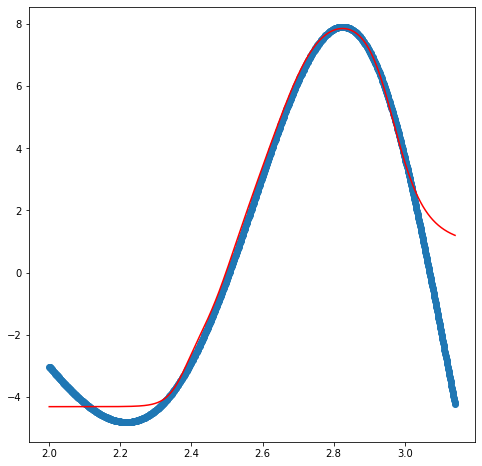

MSE 1.0301152732836791


In [18]:
# Setup your model
model = Sequential()
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh', input_shape=(5,))) # add a layer
model.add(Dense(1, activation='linear', input_shape=(5,)))


#   Compile the model using MSE as your loss function and an SGD learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.005)) #lower learning rate

print('Training..')
loss = model.fit(X, y, epochs=10000, validation_split=0.1, #way more epochs
                 batch_size=128, verbose=True)
print(loss.history['loss'][-1])
print('Complete')

# Plot
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='r')
plt.show()
print("MSE", mean_squared_error(predictions, y))

## Classification

We'll start with the Iris dataset (of course).

In [20]:
import sklearn.datasets as datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

# Break each output into indicator cols
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(150, 4) (150, 3)


In [21]:
# Define a model
model = Sequential()

# First layer - input diminsions=k features.
model.add(Dense(4, activation='tanh', input_shape=(4,)))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(3, activation='softmax', input_shape=(4,)))

# Uses categorical_crossentropy and Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [23]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=100, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays accuracy at last iteration
print("Training complete")

Training...
0.5010865330696106
Training complete


In [24]:
# Model evaluation

preds  = model.predict(X, verbose=False).argmax(axis=-1)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

ACCURACY:  0.6666666666666666
CONFUSION MATRIX:
 [[50  0  0]
 [ 0 50  0]
 [ 0 50  0]]


Text(0.5, 1.0, 'categorical crossentropy by Epoch')

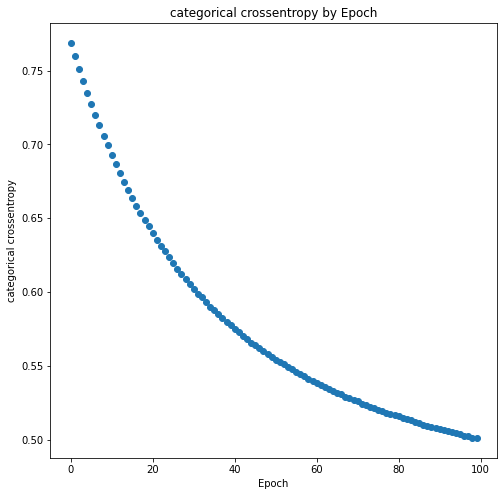

In [25]:
# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('categorical crossentropy')
plt.title('categorical crossentropy by Epoch')

## Abalone data set

In [26]:
columns = ["Sex", "Length", "Diameter", "Height", "Whole Weight",
           "Shucked weight", "Viscera weight", "Shell weight", "Rings" ]
df = pd.read_csv("./data/abalone.data", names=columns)

df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [27]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


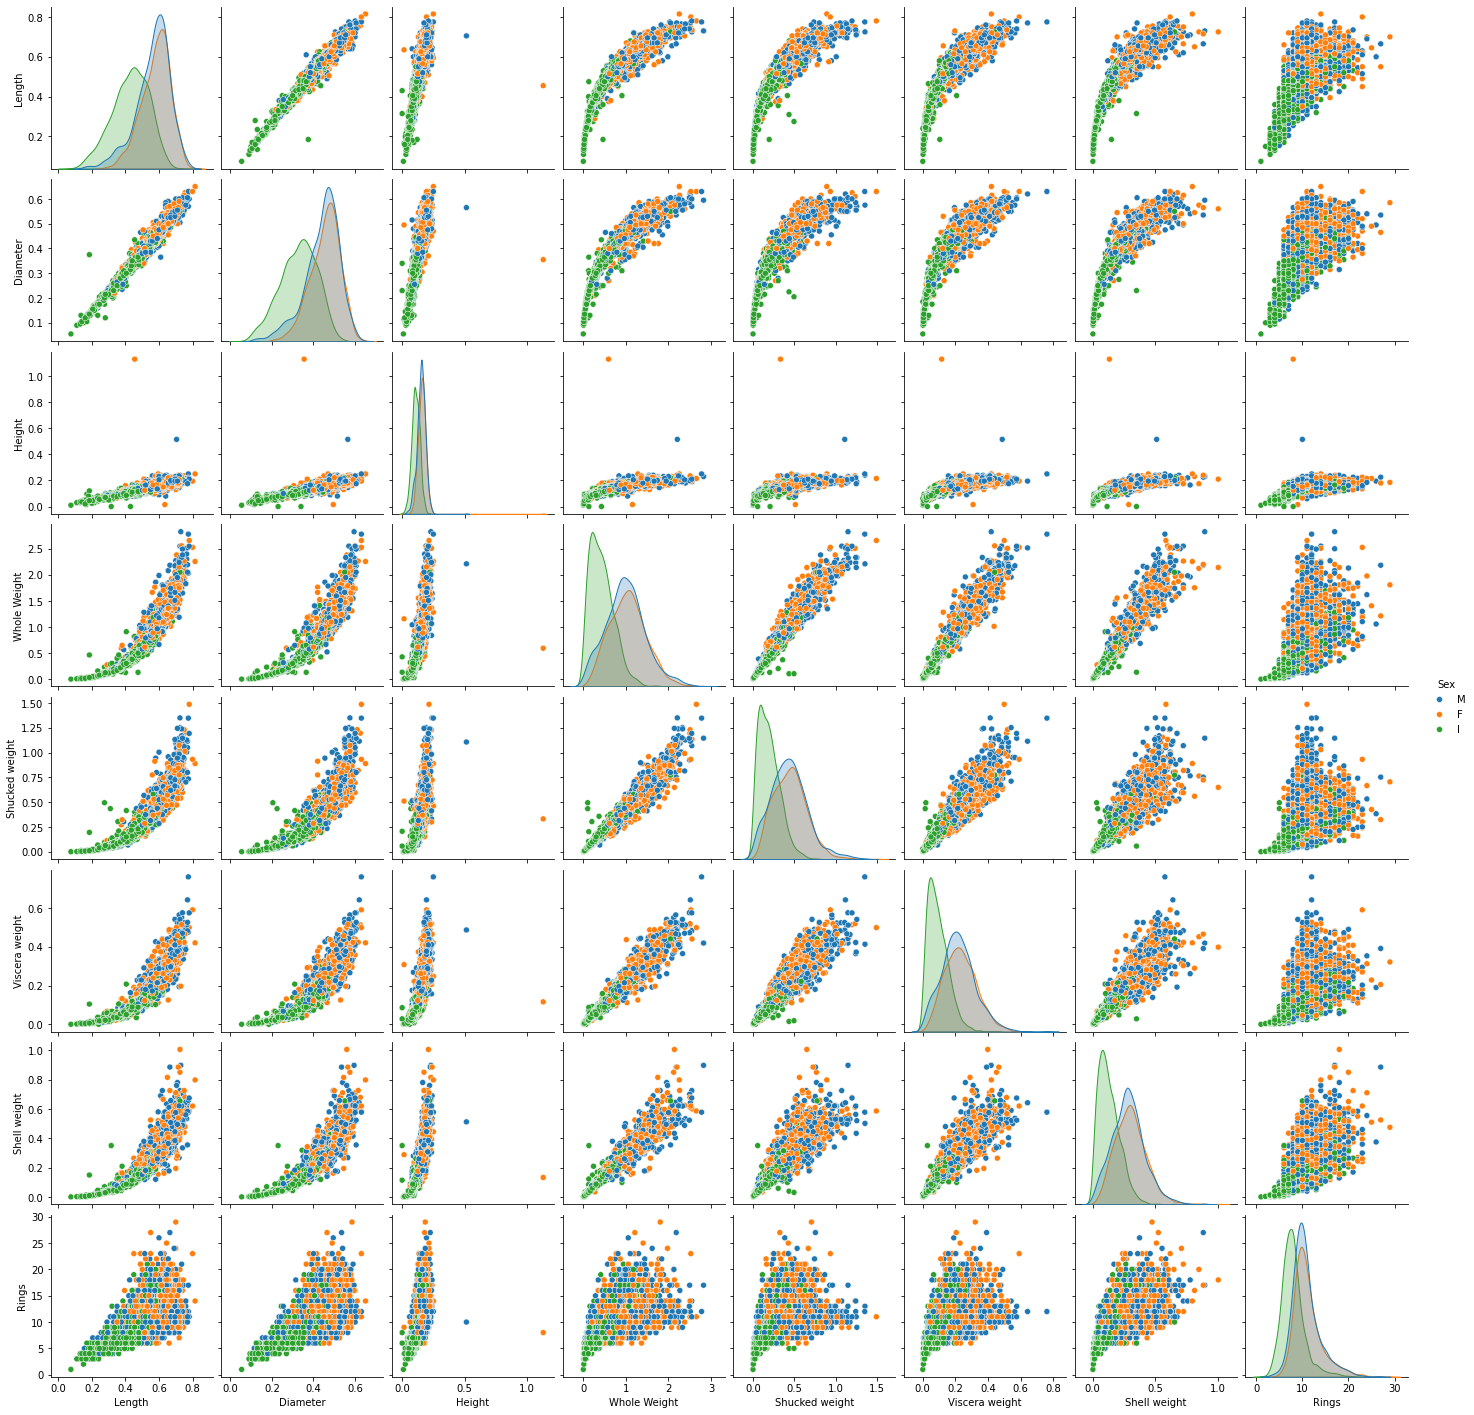

In [28]:
import seaborn as sns
sns.pairplot(data=df, vars=columns[1:], hue="Sex")
plt.show()

In [29]:
d = {'M': 0, 'F': 1, 'I': 2}
df["Sex"] = df["Sex"].apply(lambda x: d[x])

In [30]:
df.describe()

,Sex,Length,Diameter,Height,Whole Weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [31]:
X = np.array(df[columns[1:]])
y = np.array(df["Sex"])
y_cat = pd.get_dummies(y).values

print(X.shape, y_cat.shape)

(4177, 8) (4177, 3)


In [32]:
# Define a model
model = Sequential()

# input_dim = number of neurons in previous layer.
# output_dim = number of neurons in current layer.

# First layer - input_dim=k features.
model.add(Dense(6, activation='tanh', input_shape=(8,)))

#Second, hidden layer
model.add(Dense(8, activation='tanh', input_shape=(6,)))

# Output layer - output_dim=# of output per point (in y).
# Use 'softmax' for class probability. 'linear' for regression
model.add(Dense(3, activation='softmax', input_shape=(8,)))


# Uses categorical_crossentropy and Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

In [33]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.1, epochs=50, 
                 batch_size=16, verbose=False)

print(loss.history['loss'][-1])   # displays categorical_crossentropy at last iteration
print("Training complete")

Training...
0.875193178653717
Training complete


ACCURACY:  0.5379458941824276
CONFUSION MATRIX:
 [[1234    0  294]
 [1141    0  166]
 [ 329    0 1013]]


Text(0.5, 1.0, 'categorical_crossentropy by Epoch')

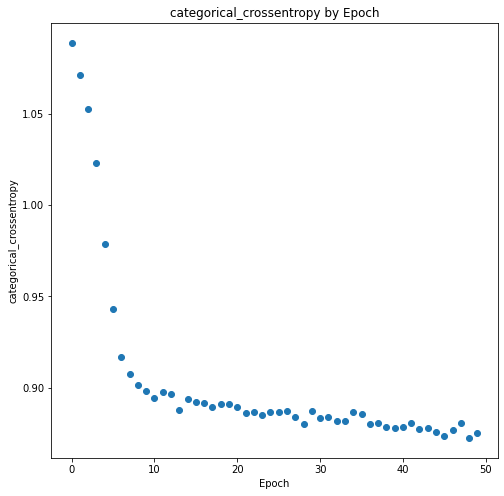

In [34]:
# Model evaluation

preds  = model.predict(X, verbose=False).argmax(axis=-1)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('categorical_crossentropy')
plt.title('categorical_crossentropy by Epoch')

## Exercise

Classify the following data ([source](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope)). You'll need to translate the classes into integers and make dummies. Design a neural network to classify the data and evaluate the results.

In [38]:
names = "fLength fWidth fSize fConc fConc1 fAsym fM3Long fM3Trans fAlpha fDist class".split()
df = pd.read_csv("./data/magic04.data", names=names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [50]:
df['class'].value_counts()

0    12332
1     6688
Name: class, dtype: int64

In [39]:
# Create a dictionary to change the class to an int
d = {'g': 0, 'h': 1}
df["class"] = df["class"].apply(lambda x: d[x])

In [40]:
# Move create your X, y and y_cat datasets
X = np.array(df[df.columns[:-1]])
y = np.array(df["class"])
y_cat = pd.get_dummies(y).values

In [51]:
y_cat

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]], dtype=uint8)

In [52]:
# What's their shape?
print(X.shape, y_cat.shape)

(19020, 10) (19020, 2)


In [42]:
# Define a model? Why not!
model = Sequential()

# How many input dimensions does X have?
# What are our output dimensions?
# Build our first layer
model.add(Dense(6,activation='tanh', input_shape=(10,)))

# Choose a value for the hidden layer
model.add(Dense(6,activation='tanh', input_shape=(6,)))
# Create the Output layer - how many output dimensions should you have?

model.add(Dense(2,activation='softmax', input_shape=(6,)))

In [43]:
# Uses Categorical crossentropy and Stochastic Gradient Descent
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01))

In [44]:
# Train the model
print('Training...')
loss = model.fit(X, y_cat, 
                 validation_split=0.2, epochs=1000, 
                 batch_size=256, verbose=True)

print(loss.history['loss'][-1])   # displays accuracy at last iteration
print("Training complete")

Training...
Epoch 1/1000
60/60 [==============================] - 0s 3ms/step - loss: 0.5603 - val_loss: 1.2982
Epoch 2/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4825 - val_loss: 1.5113
Epoch 3/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4712 - val_loss: 1.5893
Epoch 4/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4670 - val_loss: 1.6140
Epoch 5/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4643 - val_loss: 1.6282
Epoch 6/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4617 - val_loss: 1.6235
Epoch 7/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 1.6137
Epoch 8/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4558 - val_loss: 1.5985
Epoch 9/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4535 - val_loss: 1.5851
Epoch 10/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.4515 - val_

60/60 [==============================] - 0s 1ms/step - loss: 0.3963 - val_loss: 1.3253
Epoch 83/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3949 - val_loss: 1.3217
Epoch 84/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3955 - val_loss: 1.3457
Epoch 85/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 1.3972
Epoch 86/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3948 - val_loss: 1.3388
Epoch 87/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3961 - val_loss: 1.3491
Epoch 88/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3951 - val_loss: 1.2196
Epoch 89/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3949 - val_loss: 1.3415
Epoch 90/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.3939 - val_loss: 1.3322
Epoch 91/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3947 - val_loss: 1.3785
Epoc

60/60 [==============================] - 0s 1ms/step - loss: 0.3885 - val_loss: 1.3245
Epoch 163/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3867 - val_loss: 1.2787
Epoch 164/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3871 - val_loss: 1.3145
Epoch 165/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3871 - val_loss: 1.2960
Epoch 166/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3864 - val_loss: 1.2778
Epoch 167/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3871 - val_loss: 1.3179
Epoch 168/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3876 - val_loss: 1.2256
Epoch 169/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3873 - val_loss: 1.2550
Epoch 170/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3868 - val_loss: 1.2175
Epoch 171/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3864 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3844 - val_loss: 1.2600
Epoch 243/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3849 - val_loss: 1.3126
Epoch 244/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3839 - val_loss: 1.2939
Epoch 245/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3839 - val_loss: 1.2750
Epoch 246/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3838 - val_loss: 1.2804
Epoch 247/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3825 - val_loss: 1.2960
Epoch 248/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3836 - val_loss: 1.2747
Epoch 249/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3839 - val_loss: 1.1711
Epoch 250/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3848 - val_loss: 1.2193
Epoch 251/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3838 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3818 - val_loss: 1.1843
Epoch 323/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3797 - val_loss: 1.3943
Epoch 324/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.3816 - val_loss: 1.2718
Epoch 325/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3821 - val_loss: 1.3040
Epoch 326/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3830 - val_loss: 1.2618
Epoch 327/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.3792 - val_loss: 1.2560
Epoch 328/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3796 - val_loss: 1.2020
Epoch 329/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3814 - val_loss: 1.2417
Epoch 330/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3806 - val_loss: 1.2676
Epoch 331/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3797 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3755 - val_loss: 1.3151
Epoch 403/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3770 - val_loss: 1.2892
Epoch 404/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3758 - val_loss: 1.3727
Epoch 405/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3769 - val_loss: 1.2867
Epoch 406/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3773 - val_loss: 1.3401
Epoch 407/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.3773 - val_loss: 1.1722
Epoch 408/1000
60/60 [==============================] - 0s 2ms/step - loss: 0.3763 - val_loss: 1.2251
Epoch 409/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 1.2167
Epoch 410/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3784 - val_loss: 1.4100
Epoch 411/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3765 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3735 - val_loss: 1.2728
Epoch 483/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3774 - val_loss: 0.9085
Epoch 484/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3738 - val_loss: 1.0116
Epoch 485/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3736 - val_loss: 1.2361
Epoch 486/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 1.1914
Epoch 487/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3733 - val_loss: 1.2901
Epoch 488/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3745 - val_loss: 1.1958
Epoch 489/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3767 - val_loss: 1.0975
Epoch 490/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3733 - val_loss: 1.1956
Epoch 491/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3733 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3744 - val_loss: 1.1683
Epoch 563/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3717 - val_loss: 1.1551
Epoch 564/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3724 - val_loss: 1.2858
Epoch 565/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3684 - val_loss: 1.2865
Epoch 566/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3721 - val_loss: 1.2265
Epoch 567/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3726 - val_loss: 1.1468
Epoch 568/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3730 - val_loss: 1.2730
Epoch 569/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3706 - val_loss: 1.4168
Epoch 570/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3686 - val_loss: 1.2570
Epoch 571/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3781 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3714 - val_loss: 1.2481
Epoch 643/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 1.5492
Epoch 644/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3725 - val_loss: 1.3025
Epoch 645/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3644 - val_loss: 1.2980
Epoch 646/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3707 - val_loss: 1.1207
Epoch 647/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3697 - val_loss: 1.1933
Epoch 648/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3724 - val_loss: 1.0038
Epoch 649/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 1.1161
Epoch 650/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3720 - val_loss: 1.2380
Epoch 651/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3698 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 1.2485
Epoch 723/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3724 - val_loss: 1.0764
Epoch 724/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3683 - val_loss: 1.3157
Epoch 725/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3678 - val_loss: 0.9971
Epoch 726/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3623 - val_loss: 1.1255
Epoch 727/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3723 - val_loss: 1.2239
Epoch 728/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3659 - val_loss: 1.3786
Epoch 729/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3673 - val_loss: 1.1540
Epoch 730/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3711 - val_loss: 1.0187
Epoch 731/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3674 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3642 - val_loss: 1.3688
Epoch 803/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3659 - val_loss: 1.2036
Epoch 804/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3727 - val_loss: 1.5184
Epoch 805/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3634 - val_loss: 1.0806
Epoch 806/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3678 - val_loss: 1.4643
Epoch 807/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3633 - val_loss: 0.9610
Epoch 808/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3604 - val_loss: 1.2866
Epoch 809/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3696 - val_loss: 0.8474
Epoch 810/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3665 - val_loss: 1.1915
Epoch 811/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3666 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3605 - val_loss: 1.2617
Epoch 883/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3603 - val_loss: 1.3954
Epoch 884/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3618 - val_loss: 1.4569
Epoch 885/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3621 - val_loss: 1.4621
Epoch 886/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3671 - val_loss: 1.5495
Epoch 887/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 1.3022
Epoch 888/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3587 - val_loss: 1.1643
Epoch 889/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3637 - val_loss: 0.5653
Epoch 890/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3669 - val_loss: 1.1746
Epoch 891/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3616 - val_loss: 1.

60/60 [==============================] - 0s 1ms/step - loss: 0.3564 - val_loss: 1.1655
Epoch 963/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3629 - val_loss: 1.1783
Epoch 964/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3618 - val_loss: 1.1213
Epoch 965/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3661 - val_loss: 1.0901
Epoch 966/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3620 - val_loss: 1.4221
Epoch 967/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3678 - val_loss: 1.3039
Epoch 968/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3700 - val_loss: 1.4469
Epoch 969/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3625 - val_loss: 0.7338
Epoch 970/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3614 - val_loss: 1.2986
Epoch 971/1000
60/60 [==============================] - 0s 1ms/step - loss: 0.3640 - val_loss: 1.

595/595 [==============================] - 1s 798us/step
ACCURACY:  0.7614616193480547
CONFUSION MATRIX:
 [[12166   166]
 [ 4371  2317]]


Text(0.5, 1.0, 'categorical crossentropy by Epoch')

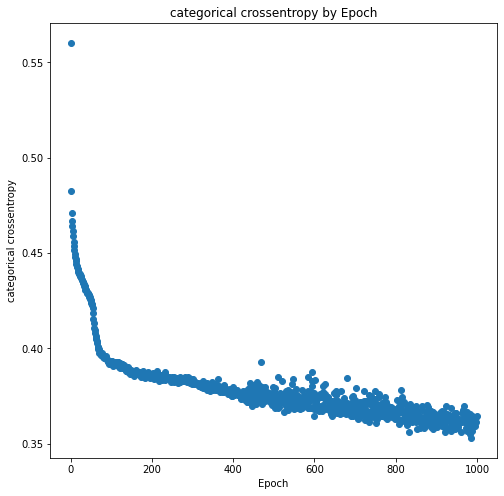

In [45]:
# Model evaluation - maybe accuracy and confusion matrix?

preds  = model.predict(X).argmax(axis=-1)

print('ACCURACY: ', accuracy_score(y, preds))
print('CONFUSION MATRIX:\n', confusion_matrix(y, preds))

# Plot the error over time

plt.scatter(range(len(loss.history['loss'])), loss.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('categorical crossentropy')
plt.title('categorical crossentropy by Epoch')

## Extra Practice 

What are better loss functions for classification problems? Can you make any of the above in this notebook better by looking at other keras losses? What about optimizing with Adam or others? 